In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

## __Pie plot__

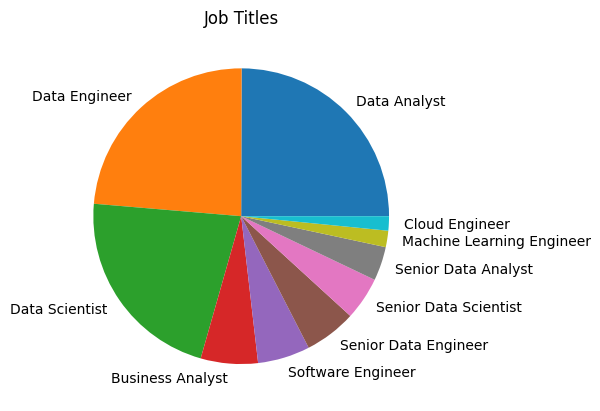

In [2]:
df['job_title_short'].value_counts().plot(kind= 'pie')
plt.title('Job Titles')
plt.ylabel('')
plt.show()

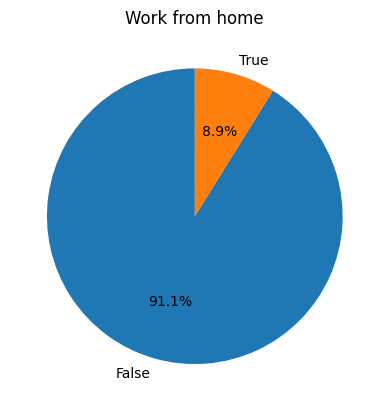

In [3]:
df['job_work_from_home'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')
plt.title("Work from home")
plt.ylabel('')
plt.show()

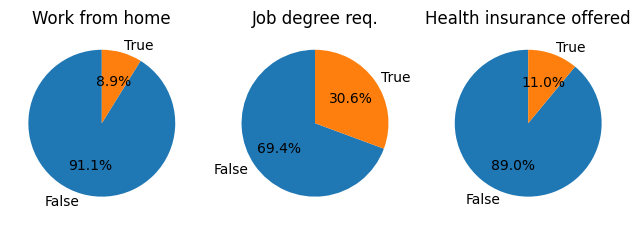

In [21]:
fig , ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home':'Work from home',
    'job_no_degree_mention':'Job degree req.',
    'job_health_insurance':'Health insurance offered'
}
for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),autopct='%1.1f%%',startangle=90,labels=[False,True])           #matplot way of plotting pie instead of pandas way
    ax[i].set_title(title)

fig.tight_layout()
plt.show()

## **Scatter Plot**

In [23]:
df = df[df['job_title_short'] == 'Data Engineer']

In [28]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)

skill_stats=skill_stats.sort_values(by='skill_count',ascending= False).head(10)

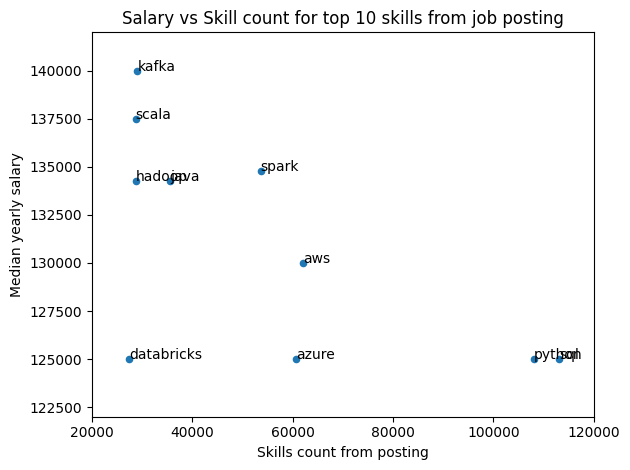

In [50]:
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('Skills count from posting')
plt.xlim(20000, 120000)
plt.ylabel('Median yearly salary')
plt.ylim(122000,142000)
plt.title("Salary vs Skill count for top 10 skills from job posting")
for i,txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],
             skill_stats['median_salary'].iloc[i],txt)
plt.tight_layout()
plt.show()